<a href="https://colab.research.google.com/github/ulwanfaqih/Portofolio/blob/main/Insight_Data_Pelanggan_Restoran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Insight-Insight dari Data Pelanggan Restoran** *(On Progress)*
oleh : Muhammad Ulwan Faqih


---



Tujuan : Mencari Insight-Insight dari data & melihat cluster pelanggan


---


---




# Import Library

In [96]:
import seaborn as sns



---


---




# DATA

In [97]:
import seaborn as sns
data_resto = sns.load_dataset('tips') 
data_resto.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Data merupakan data pelanggan restoran yang diperoleh dari 'seaborn-tips'. yang berukuran 244 baris data dan 7 kolom variabel

variabel-variabel tersebut adalah :
1. total_bill = total tagihan pelanggan selama sekali kunjungan
2. tip = tip yang diberikan pelanggan selama sekali kunjungan
3. sex = jenis kelamin (male/female)
4. smoker = perokok / tidak perokok (yes/no)
5. day = hari kunjungan (thus/fri/sat/sun)
6. time = waktu kunjungan (dinner/lunch)
7. size = banyak orang sekali kunjungan (1/2/3/4/5/6)

In [98]:
# Mengecek Keunikan Variabel
print(data_resto['size'].unique())
print(data_resto['sex'].unique())
print(data_resto['smoker'].unique())
print(data_resto['day'].unique())
print(data_resto['time'].unique())

[2 3 4 1 6 5]
['Female', 'Male']
Categories (2, object): ['Female', 'Male']
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']
['Dinner', 'Lunch']
Categories (2, object): ['Dinner', 'Lunch']


In [99]:
data_resto.shape

(244, 7)

In [100]:
data_resto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


meskipun data terlihat rapih, tetap harus di cek kerapihannya, **akan dilakukan pre-processing**


---


---




# Pre-Processing



---


**mengecek missing value**

In [101]:
print(data_resto.isnull().sum())
print(data_resto.isnull().sum().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
0


tidak ditemukan missing value


---







**mengecek duplikasi**

In [102]:
print(data_resto.shape)
data_resto.duplicated().sum()

(244, 7)


1

ditemukan 1 duplikasi

In [103]:
data_resto.drop_duplicates(inplace=True)
print(data_resto.duplicated().sum()) 
print(data_resto.shape) 

0
(243, 7)


data setelah dihapus duplikasi menjadi 243 baris data, dan setelah kiranya data sudah rapih, **maka selanjutnya akan dicari insight**


---



---



# Insight from Data

In [104]:
data_resto.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4




---



**1 Variabel**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


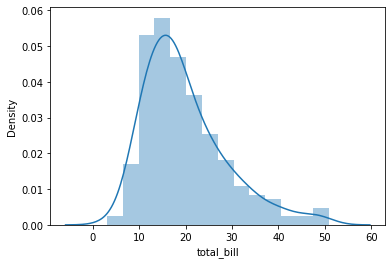

In [105]:
p = sns.distplot(data_resto['total_bill'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


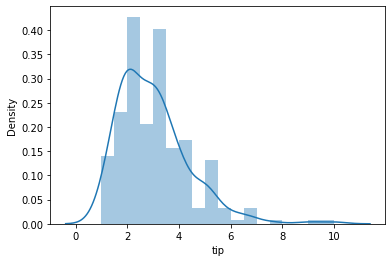

In [106]:
p = sns.distplot(data_resto['tip'])

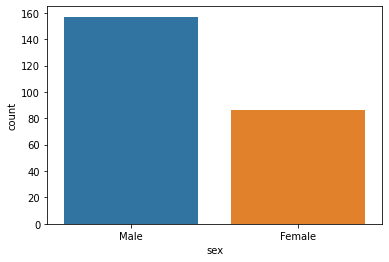

In [107]:
p = sns.countplot(x ="sex",data=data_resto)

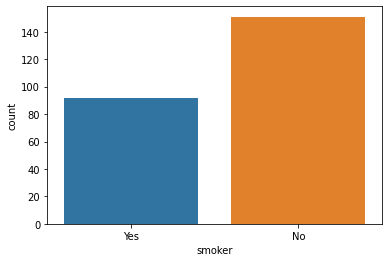

In [108]:
p = sns.countplot(x ="smoker",data=data_resto)

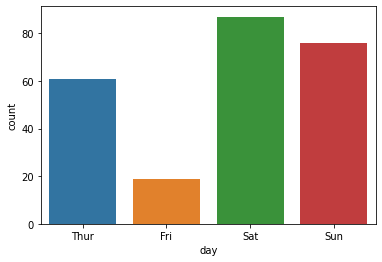

In [109]:
p = sns.countplot(x ="day",data=data_resto)

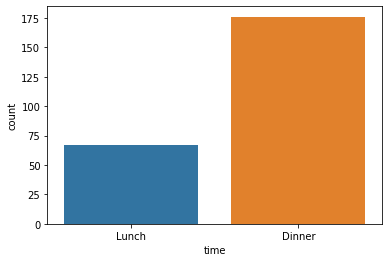

In [110]:
p = sns.countplot(x ="time",data=data_resto)

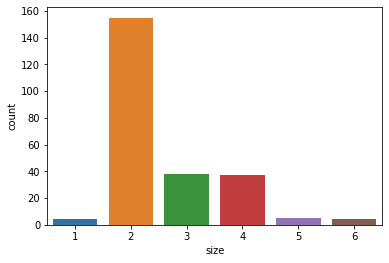

In [111]:
p = sns.countplot(x ="size",data=data_resto)



---



**2 Variabel**

In [112]:
data_resto.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


[Text(0, 0.5, 'Total Tagihan'),
 Text(0.5, 0, 'Tip Pelanggan'),
 Text(0.5, 1.0, 'Scatter Plot Total Tagihan & Tip Pelanggan')]

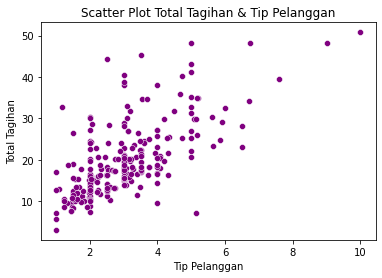

In [113]:
p = sns.scatterplot(y=data_resto['total_bill'], x=data_resto['tip'], marker = 'o', color='purple')
p.set(xlabel='Tip Pelanggan', ylabel='Total Tagihan', title='Scatter Plot Total Tagihan & Tip Pelanggan')

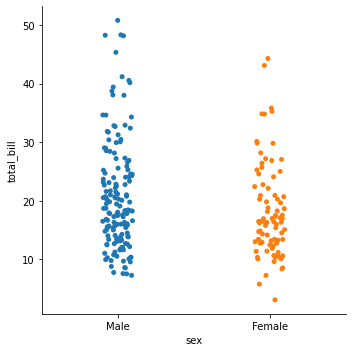

In [114]:
p = sns.catplot(x="sex", y="total_bill", data=data_resto)

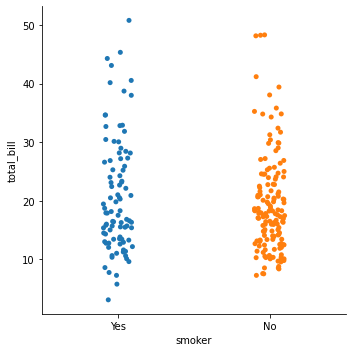

In [115]:
p = sns.catplot(x="smoker", y="total_bill", data=data_resto)

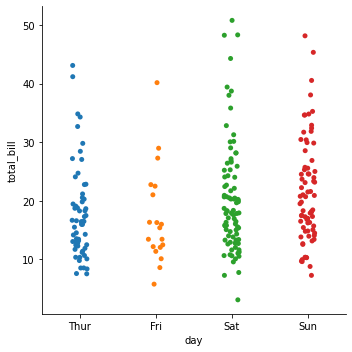

In [116]:
p = sns.catplot(x="day", y="total_bill", data=data_resto)

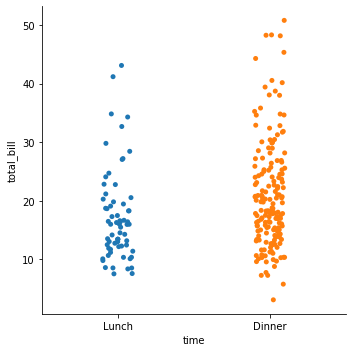

In [117]:
p = sns.catplot(x="time", y="total_bill", data=data_resto)

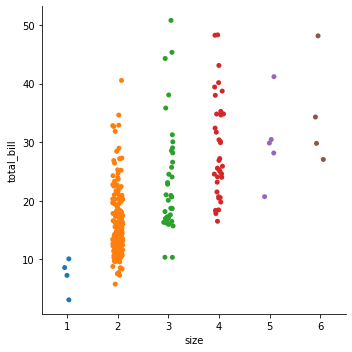

In [118]:
p = sns.catplot(x="size", y="total_bill", data=data_resto)

In [119]:
data_resto.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


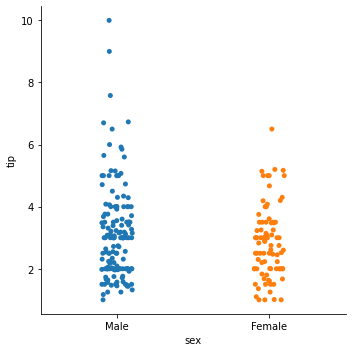

In [120]:
p = sns.catplot(x="sex", y="tip", data=data_resto)

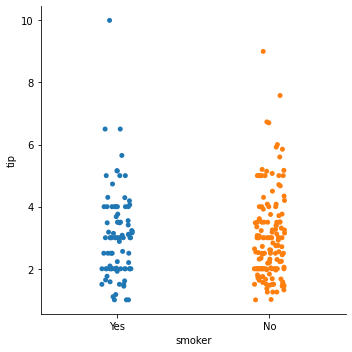

In [121]:
p = sns.catplot(x="smoker", y="tip", data=data_resto)

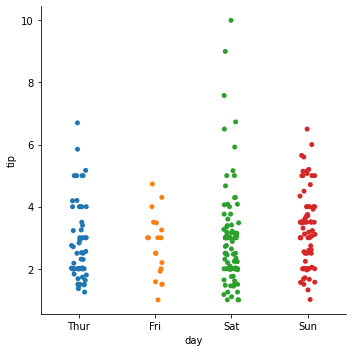

In [122]:
p = sns.catplot(x="day", y="tip", data=data_resto)

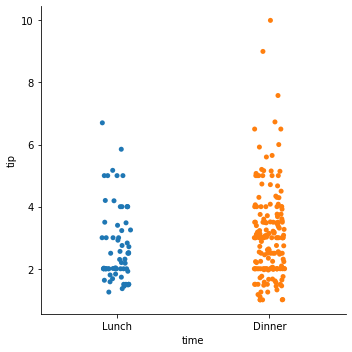

In [123]:
p = sns.catplot(x="time", y="tip", data=data_resto)

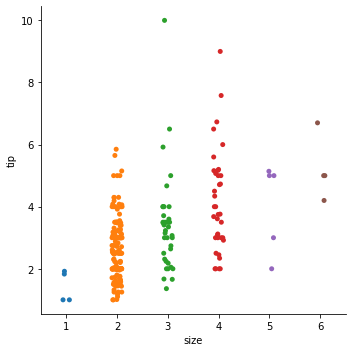

In [124]:
p = sns.catplot(x="size", y="tip", data=data_resto)

In [125]:
data_resto.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


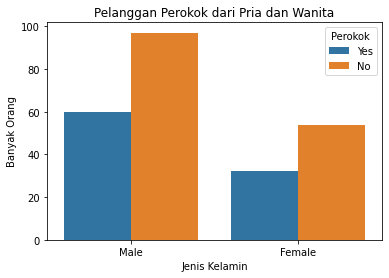

In [126]:
p = sns.countplot(x="sex", hue="smoker", data=data_resto)
p.set(xlabel='Jenis Kelamin', ylabel='Banyak Orang', title='Pelanggan Perokok dari Pria dan Wanita')
p.legend(title = "Perokok", loc = 0)

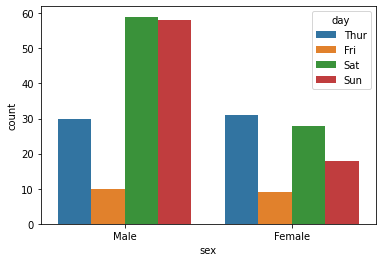

In [127]:
p = sns.countplot(x="sex", hue="day", data=data_resto)

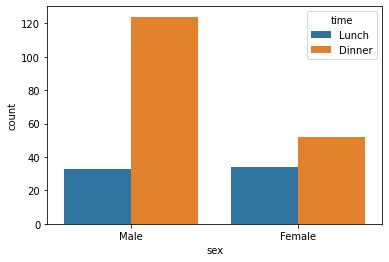

In [128]:
p = sns.countplot(x="sex", hue="time", data=data_resto)

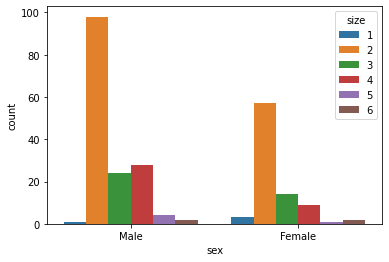

In [129]:
p = sns.countplot(x="sex", hue="size", data=data_resto)

In [130]:
data_resto.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


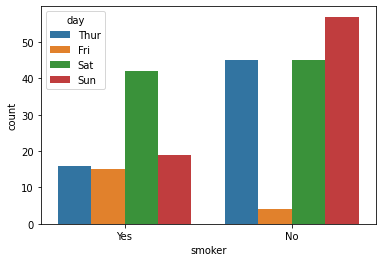

In [131]:
p = sns.countplot(x="smoker", hue="day", data=data_resto)

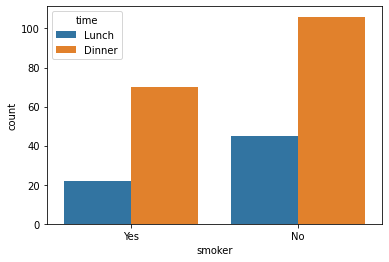

In [132]:
p = sns.countplot(x="smoker", hue="time", data=data_resto)

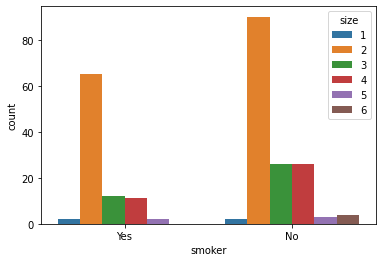

In [133]:
p = sns.countplot(x="smoker", hue="size", data=data_resto)

In [134]:
data_resto.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


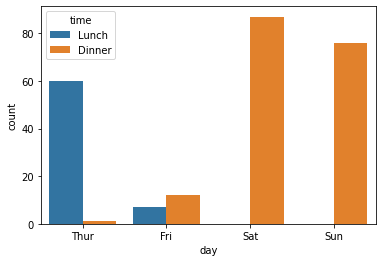

In [135]:
p = sns.countplot(x="day", hue="time", data=data_resto)

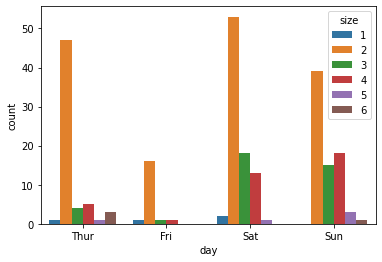

In [136]:
p = sns.countplot(x="day", hue="size", data=data_resto)

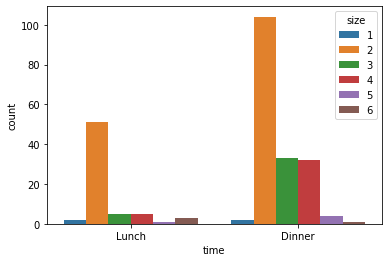

In [137]:
p = sns.countplot(x="time", hue="size", data=data_resto)



---



**3 Variabel**

In [138]:
data_resto.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


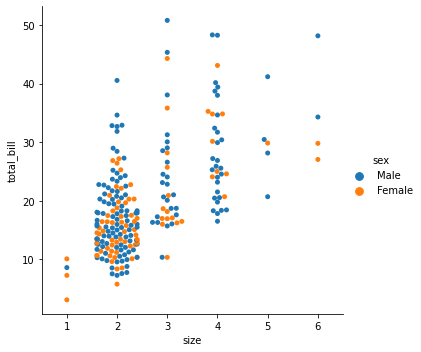

In [139]:
p= sns.catplot(x= "size", y="total_bill", hue ="sex" , kind ="swarm",data=data_resto)

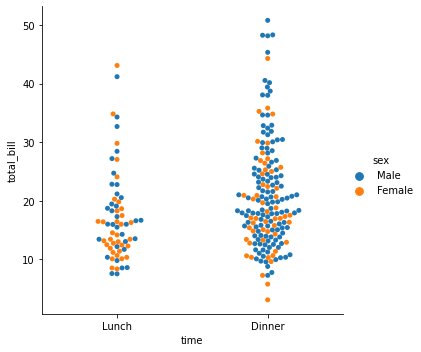

In [140]:
p= sns.catplot(x= "time", y="total_bill", hue ="sex" , kind ="swarm",data=data_resto)

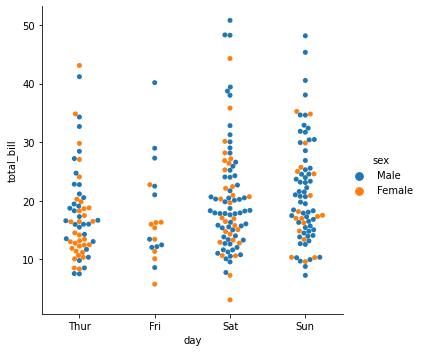

In [141]:
p= sns.catplot(x= "day", y="total_bill", hue ="sex" , kind ="swarm",data=data_resto)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 59.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; y

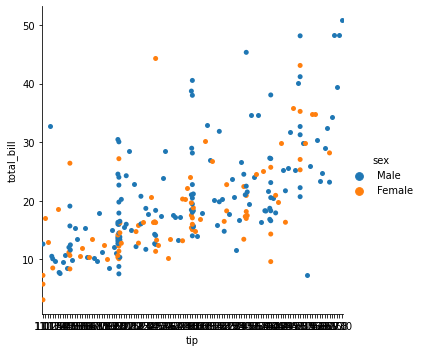

In [142]:
p= sns.catplot(x= "tip", y="total_bill", hue ="sex" , kind ="swarm",data=data_resto)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 59.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; y

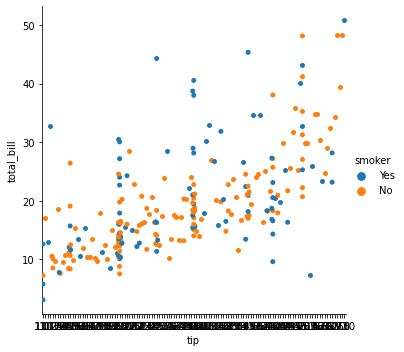

In [143]:
p= sns.catplot(x= "tip", y="total_bill", hue ="smoker" , kind ="swarm",data=data_resto)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 59.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; y

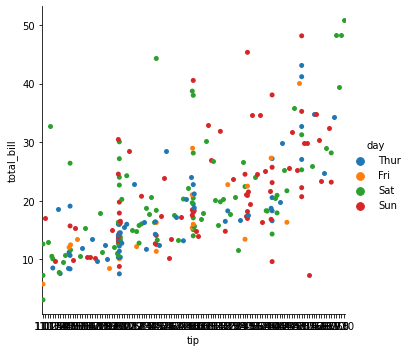

In [144]:
p= sns.catplot(x= "tip", y="total_bill", hue ="day" , kind ="swarm",data=data_resto)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 59.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; y

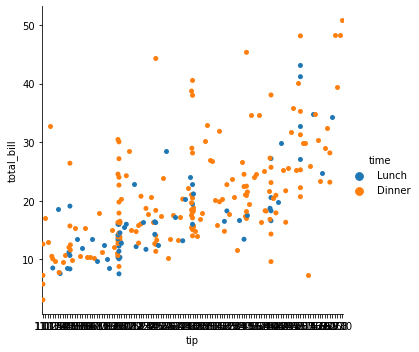

In [145]:
p= sns.catplot(x= "tip", y="total_bill", hue ="time" , kind ="swarm",data=data_resto)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 59.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; y

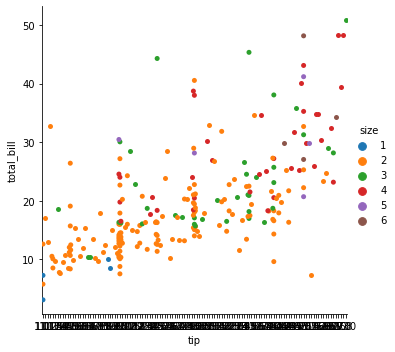

In [146]:
p= sns.catplot(x= "tip", y="total_bill", hue ="size" , kind ="swarm",data=data_resto)

# Cluster Pelanggan